In [1]:
from model.layers import Conv2D, Flatten, FullyConnected, Pooling, Padding
from model.model import Model
from model.optimizers import Adam, SGD
from model.activations import ReLU, Softmax, Tanh
from model.losses import cross_entropy, mean_squared_error

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import numpy as np
import os

In [4]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Number of training examples: {x_train.shape[0]}")
print(f"Number of testing examples: {x_train.shape[0]}")
print(f"Size of each image: {x_train.shape[1:]}")

Number of training examples: 60000
Number of testing examples: 60000
Size of each image: (28, 28)


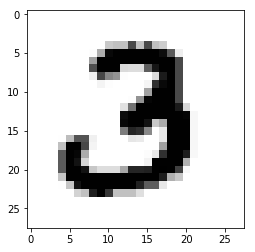

In [5]:
selected_image = x_train[242]

plt.imshow(selected_image, cmap="Greys")

In [6]:
def fix_y(arr):
    """
    Transforms the given array to a onehot encoded vector
    """
    new_arr = np.zeros((arr.shape[0], 10))
    for idx in range(arr.shape[0]):
        new_arr[idx][arr[idx]] = 1
    return new_arr

y_train = fix_y(y_train).astype("float32")
y_test = fix_y(y_test).astype("float32")

x_train = np.expand_dims(x_train, -1).astype("float32") / 255.0
x_test = np.expand_dims(x_test, -1).astype("float32") / 255.0

In [7]:
model = Model([
    Padding(2, mode="zero"),
    Pooling((3, 3), 1, mode='max'),
    Conv2D((4, 4), step=2, filters=8),
    Tanh(),
    Padding(2, mode="zero"),
    Pooling((3, 3), 1, mode='max'),
    Conv2D((4, 4), step=1, filters=4),
    Tanh(),
    Flatten(),
    FullyConnected(10),
    Softmax()
])

In [8]:
optimizer = Adam(0.015)

In [9]:
# run the model on some data to create weights
model(x_train[:3])

optimizer.register_variables(model)

In [10]:
model.calculate_size()

7422

In [11]:
def split_data_to_batches(X, Y, batch_size):
    batches = X.shape[0] // batch_size
    for batch_idx in range(batches):
        start = batch_idx*batch_size
        end = (batch_idx+1)*batch_size
        yield X[start:end], Y[start:end]

In [12]:
weights_prefix = "training/"
if not os.path.exists(weights_prefix):
    os.mkdir(weights_prefix)

In [13]:
EPOCHS = 30
losses = []

for epoch in range(1, EPOCHS+1):
    epoch_loss = []
    for x,y in split_data_to_batches(x_train, y_train, 60000):
        preds = model(x)
        loss = cross_entropy(y, preds)
        model.backward(y, preds, optimizer)
        epoch_loss.append(loss)
    print(f"Epoch {epoch} finished!\tLoss: {np.mean(epoch_loss):.5f}")
    losses.extend(epoch_loss)
    model.save(weights_prefix + "epoch" + str(epoch))

Epoch 1 finished!	Loss: 2.30257
Epoch 2 finished!	Loss: 2.29369
Epoch 3 finished!	Loss: 2.24633
Epoch 4 finished!	Loss: 2.17906
Epoch 5 finished!	Loss: 2.09548
Epoch 6 finished!	Loss: 2.00060
Epoch 7 finished!	Loss: 1.89891
Epoch 8 finished!	Loss: 1.79588
Epoch 9 finished!	Loss: 1.69384
Epoch 10 finished!	Loss: 1.60150
Epoch 11 finished!	Loss: 1.53012
Epoch 12 finished!	Loss: 1.48168
Epoch 13 finished!	Loss: 1.40713
Epoch 14 finished!	Loss: 1.38401
Epoch 15 finished!	Loss: 1.31965


In [16]:
for epoch in range(16, 31):
    epoch_loss = []
    for x,y in split_data_to_batches(x_train, y_train, 60000):
        preds = model(x)
        loss = cross_entropy(y, preds)
        model.backward(y, preds, optimizer)
        epoch_loss.append(loss)
    print(f"Epoch {epoch} finished!\tLoss: {np.mean(epoch_loss):.5f}")
    losses.extend(epoch_loss)
    model.save(weights_prefix + "epoch" + str(epoch))

Epoch 16 finished!	Loss: 1.31309
Epoch 17 finished!	Loss: 1.25079
Epoch 18 finished!	Loss: 1.25395
Epoch 19 finished!	Loss: 1.19593
Epoch 20 finished!	Loss: 1.20283
Epoch 21 finished!	Loss: 1.15026
Epoch 22 finished!	Loss: 1.15943
Epoch 23 finished!	Loss: 1.11022
Epoch 24 finished!	Loss: 1.12232
Epoch 25 finished!	Loss: 1.07399
Epoch 26 finished!	Loss: 1.08845
Epoch 27 finished!	Loss: 1.04086
Epoch 28 finished!	Loss: 1.05728
Epoch 29 finished!	Loss: 1.00990
Epoch 30 finished!	Loss: 1.02830


In [19]:
for epoch in range(31, 41):
    epoch_loss = []
    for x,y in split_data_to_batches(x_train, y_train, 60000):
        preds = model(x)
        loss = cross_entropy(y, preds)
        model.backward(y, preds, optimizer)
        epoch_loss.append(loss)
    print(f"Epoch {epoch} finished!\tLoss: {np.mean(epoch_loss):.5f}")
    losses.extend(epoch_loss)
    model.save(weights_prefix + "epoch" + str(epoch))

Epoch 31 finished!	Loss: 0.98107
Epoch 32 finished!	Loss: 1.00160
Epoch 33 finished!	Loss: 0.95492
Epoch 34 finished!	Loss: 0.97737
Epoch 35 finished!	Loss: 0.93034
Epoch 36 finished!	Loss: 0.95417
Epoch 37 finished!	Loss: 0.90670
Epoch 38 finished!	Loss: 0.93210
Epoch 39 finished!	Loss: 0.88524
Epoch 40 finished!	Loss: 0.91086


In [20]:
preds = model(x_test)
preds_am = np.argmax(preds, axis=1)
real = y_test
real_am = np.argmax(real, axis=1)

print(f"Test accuracy: {sum(preds_am == real_am)/x_test.shape[0] * 100:.2f}%")

Test accuracy: 74.37%


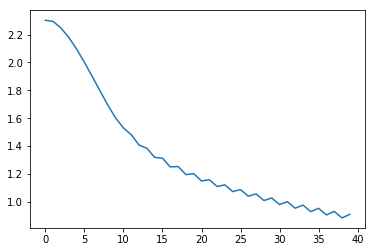

In [21]:
plt.plot(losses)
plt.show()